<a href="https://colab.research.google.com/github/Raju-24-25/Model-Building-Handsons/blob/main/Logistic_Regression_Handson_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1679923530-8258.avif

The data is related to direct marketing campaign direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., logistic). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Load the ness. Lib

### Load the dataset

### EDA---->
 1. **Shape of data**
 2. **Infrence of the data**
 3. **Outliers**
 4. **Null values**

### Feature Eng.--->Encoding,rescaling


### Feature Selection--->corr,vif etc

### Model Building

### Model Evalution

### Model Deployment

Dataset link-https://drive.google.com/file/d/1KEkAqdwojbLEjoafTvUt-LCcBqf8imQk/view?usp=sharing

In [1]:
import numpy as np   # Numerical Python
import pandas as pd   # Data Manipulation
import seaborn as sns    # Visualization
import matplotlib.pyplot as plt   # Visualization
import plotly.express as px   # Visualization

In [2]:
# Load The Data Set
df = pd.read_csv('/content/bank-additional-full-1.csv', sep = ';')    # Alternate, here we have used 'sep', we can also use 'delimiter' in replace of that.
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Bank Client Data**:

1 - age (numeric)


2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')


3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)


4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')


5 - default: has credit in default? (categorical: 'no','yes','unknown')


6 - housing: has housing loan? (categorical: 'no','yes','unknown')


7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:


8 - contact: contact communication type (categorical: 'cellular','telephone')


9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')


10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')


11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


other attributes:


12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)


14 - previous: number of contacts performed before this campaign and for this client (numeric)


15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


social and economic context attributes


16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)


17 - cons.price.idx: consumer price index - monthly indicator (numeric)


18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)


19 - euribor3m: euribor 3 month rate - daily indicator (numeric)


20 - nr.employed: number of employees - quarterly indicator (numeric)


Output variable (desired target):


21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



#*EDA - Exploratory Data Analysis*

In [3]:
df.shape

(41199, 21)

In [4]:
df.info()    # Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [5]:
df.describe()    # Descriptive Statistics

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### **Summary Statistics** (for Numerical Features):

1. **age**:
   - **Count**: 41,195 entries, indicating that this column has missing values.
   - **Mean**: 40.03 years, suggesting that the average age of individuals in the dataset is around 40 years.
   - **Standard Deviation (std)**: 10.43 years, indicating moderate variability in the age of individuals.
   - **Minimum**: 17 years, showing that the youngest individual is 17 years old.
   - **25th Percentile (Q1)**: 32 years, which is the lower quartile where 25% of the individuals are younger than this age.
   - **50th Percentile (Median)**: 38 years, indicating that half of the individuals are younger than 38 years.
   - **75th Percentile (Q3)**: 47 years, suggesting that 75% of individuals are younger than 47 years.
   - **Maximum**: 98 years, with the oldest individual being 98 years old.

2. **duration** (the duration of the last contact in seconds):
   - **Count**: 41,196 entries, indicating that this column has missing values.
   - **Mean**: 258.28 seconds (approximately 4 minutes and 18 seconds), representing the average duration of calls made.
   - **Standard Deviation (std)**: 259.25 seconds, showing considerable variability, indicating that some calls are much longer than the average.
   - **Minimum**: 0 seconds, which could be an issue with calls that didn’t last or possibly represent a data entry error.
   - **25th Percentile (Q1)**: 102 seconds, suggesting that 25% of the calls were shorter than 102 seconds.
   - **50th Percentile (Median)**: 180 seconds (3 minutes), implying that half of the calls lasted less than 3 minutes.
   - **75th Percentile (Q3)**: 319 seconds (around 5 minutes), indicating that 75% of calls lasted less than 5 minutes.
   - **Maximum**: 4,918 seconds (around 82 minutes), which is an unusually long duration, suggesting potential outliers or extreme cases.

3. **campaign** (number of contacts performed during this campaign):
   - **Count**: 41,196 entries, indicating that this column has missing values.
   - **Mean**: 2.57 contacts, implying an average of approximately 2.5 contacts made per individual during the campaign.
   - **Standard Deviation (std)**: 2.77 contacts, showing a relatively wide spread in the number of contacts made.
   - **Minimum**: 1 contact, which is the fewest contacts made.
   - **25th Percentile (Q1)**: 1 contact, meaning that 25% of individuals were contacted only once.
   - **50th Percentile (Median)**: 2 contacts, indicating that half of the individuals were contacted at least twice.
   - **75th Percentile (Q3)**: 3 contacts, with 75% of individuals receiving 3 or fewer contacts.
   - **Maximum**: 56 contacts, suggesting the presence of a few outliers where certain individuals were contacted very frequently.

4. **pdays** (number of days since the last contact):
   - **Count**: 41,196 entries, indicating that this column has missing values.
   - **Mean**: 962.48 days (around 2.6 years), representing the average number of days since the last contact for the individuals in the dataset.
   - **Standard Deviation (std)**: 186.89 days, indicating moderate variation in the number of days since the last contact.
   - **Minimum**: 0 days, implying that some individuals were contacted recently (even on the same day).
   - **25th Percentile (Q1)**: 999 days, which could be a data-specific indicator where values greater than 999 days might be treated as missing or unavailable, depending on the dataset.
   - **50th Percentile (Median)**: 999 days, suggesting a majority of individuals have not been contacted recently (values of 999 likely represent "unknown" or "not applicable").
   - **75th Percentile (Q3)**: 999 days, showing that three-quarters of individuals are in the same situation.
   - **Maximum**: 999 days, reinforcing that many values might be placeholders for missing or non-relevant data.

5. **previous** (number of contacts before this campaign):
   - **Count**: 41,196 entries, indicating that this column has missing values.
   - **Mean**: 0.17 contacts, indicating that most individuals had few previous interactions before the current campaign.
   - **Standard Deviation (std)**: 0.49, showing that the number of previous contacts varies considerably.
   - **Minimum**: 0 contacts, meaning some individuals had no prior contact.
   - **25th Percentile (Q1)**: 0 contacts, suggesting that a significant proportion of individuals had no previous interactions.
   - **50th Percentile (Median)**: 0 contacts, confirming that half of the individuals had no prior contact.
   - **75th Percentile (Q3)**: 0 contacts, indicating that three-quarters of the individuals had zero previous contacts.
   - **Maximum**: 7 contacts, which seems reasonable given the nature of a marketing campaign, but still may indicate a few individuals with unusually high previous interactions.

---

#### **Economic and Financial Features**:
- **emp.var.rate** (employment variation rate):
   - **Mean**: 0.08, indicating that there is a small average fluctuation in employment rates.
   - **Standard Deviation**: 1.57, showing significant volatility in employment variation.
   - **Min/Max Range**: The range from -3.4 to 1.4 highlights the presence of extreme values in employment variations, which may be indicative of external economic factors.

- **cons.price.idx** (consumer price index):
   - **Mean**: 93.58, which seems to be around an index value representing price stability.
   - **Standard Deviation**: 0.58, showing minimal fluctuation.
   - **Min/Max Range**: The minimum and maximum values (92.20 to 94.77) suggest that the consumer price index in this dataset is quite stable.

- **cons.conf.idx** (consumer confidence index):
   - **Mean**: -40.50, indicating an overall low consumer confidence in the dataset (possibly in a recessionary environment).
   - **Standard Deviation**: 4.63, showing some variability in consumer confidence.
   - **Min/Max Range**: The range from -50.80 to -26.90 shows negative confidence scores, typical of an economic downturn.

- **euribor3m** (3-month Euribor rate):
   - **Mean**: 3.62%, indicating the average short-term interest rate.
   - **Standard Deviation**: 1.73%, showing some variability in interest rates.
   - **Min/Max Range**: The range from 0.63% to 5.04% suggests some fluctuation in the Euribor rate during the time frame of the data collection.

- **nr.employed** (number of employees):
   - **Mean**: 5,167, suggesting the average number of employees in the dataset.
   - **Standard Deviation**: 72, indicating slight variation in the number of employees across observations.
   - **Min/Max Range**: The range from 4,963 to 5,228 shows relatively stable employment numbers, with a slight variation in the workforce.

---

### Key Insights:
1. **Data Distribution**: The dataset contains both continuous and categorical features with considerable variability, especially in columns like `duration`, `campaign`, and `previous`.
2. **Outliers**: Some features, such as `duration` (with a maximum of 4918 seconds) and `campaign` (with a maximum of 56 contacts), exhibit potential outliers that may need further exploration.
3. **Economic Context**: Financial and economic features (`emp.var.rate`, `cons.price.idx`, etc.) suggest a period of economic instability, with negative consumer confidence and significant employment rate variation.

This statistical summary allows you to get an overall sense of the data and guides your further analysis, such as identifying anomalies, testing hypotheses, and preparing the data for modeling.



In [6]:
df.describe(include='O').T   # O - stands for Object Column

,count,unique,top,freq
job,41194,12,admin.,10422
marital,41194,4,married,24934
education,41194,8,university.degree,12168
default,41195,3,no,32595
housing,41196,3,yes,21584
loan,41195,3,no,33957
contact,41195,2,cellular,26151
month,41196,10,may,13769
day_of_week,41196,5,thu,8623
poutcome,41194,3,nonexistent,35563



#### **Summary Statistics for Categorical Features:**


---

1. **job** (type of job):
   - **Count**: 41,194 entries, indicating that this column has missing values.
   - **Unique**: 12 distinct job types, showing the diversity in the types of jobs in the dataset.
   - **Top**: `admin.`, which is the most common job type.
   - **Freq**: 10,422 occurrences of `admin.`, meaning this is the most frequent job type in the dataset.

2. **marital** (marital status):
   - **Count**: 41,194 entries, indicating that this column has missing values.
   - **Unique**: 4 different marital statuses.
   - **Top**: `married`, indicating the most common marital status in the dataset.
   - **Freq**: 24,934 occurrences of `married`, suggesting that a majority of individuals are married.

3. **education** (level of education):
   - **Count**: 41,194 entries, indicating that this column has missing values.
   - **Unique**: 8 distinct education levels.
   - **Top**: `university.degree`, which is the most common education level.
   - **Freq**: 12,168 occurrences of `university.degree`, meaning that a significant proportion of individuals have a university degree.

4. **default** (whether the individual has credit in default):
   - **Count**: 41,195 entries, indicating that this column has missing values.
   - **Unique**: 3 possible categories (`yes`, `no`, and likely `unknown`).
   - **Top**: `no`, indicating that most individuals do not have credit in default.
   - **Freq**: 32,595 occurrences of `no`, showing that the majority of individuals are not in default.

5. **housing** (whether the individual has a housing loan):
   - **Count**: 41,196 entries, indicating that this column has missing values.
   - **Unique**: 3 categories (`yes`, `no`, `unknown`).
   - **Top**: `yes`, which is the most common response.
   - **Freq**: 21,584 occurrences of `yes`, showing that most individuals have a housing loan.

6. **loan** (whether the individual has a personal loan):
   - **Count**: 41,195 entries, indicating that this column has missing values.
   - **Unique**: 3 categories (`yes`, `no`, `unknown`).
   - **Top**: `no`, indicating that the majority of individuals do not have a personal loan.
   - **Freq**: 33,957 occurrences of `no`, suggesting that most individuals do not have a personal loan.

7. **contact** (communication type used to contact the individual):
   - **Count**: 41,195 entries, indicating that this column has missing values.
   - **Unique**: 2 categories (`cellular`, `telephone`).
   - **Top**: `cellular`, the most common contact type.
   - **Freq**: 26,151 occurrences of `cellular`, meaning that most individuals were contacted by phone (cellular).

8. **month** (last contact month):
   - **Count**: 41,196 entries, indicating that this column has missing values.
   - **Unique**: 10 months, representing the different months in which individuals were contacted.
   - **Top**: `may`, the month with the highest frequency of contacts.
   - **Freq**: 13,769 occurrences of `may`, showing that May was the most common month for contact.

9. **day_of_week** (day of the week of the last contact):
   - **Count**: 41,196 entries, indicating that this column has missing values.
   - **Unique**: 5 days of the week (`mon`, `tue`, `wed`, `thu`, `fri`).
   - **Top**: `thu` (Thursday), the most common day for contacts.
   - **Freq**: 8,623 occurrences of `thu`, suggesting that Thursday is the most common day for contact.

10. **poutcome** (outcome of the previous marketing campaign):
    - **Count**: 41,194 entries, with some missing data.
    - **Unique**: 3 possible outcomes (`nonexistent`, `failure`, `success`).
    - **Top**: `nonexistent`, meaning that the majority of individuals did not have any outcome from the previous marketing campaign.
    - **Freq**: 35,563 occurrences of `nonexistent`, indicating that most individuals were either not contacted in the previous campaign or had no outcome.

11. **y** (whether the individual subscribed to the term deposit, i.e., target variable):
    - **Count**: 41,196 entries, indicating that this column has missing values.
    - **Unique**: 2 categories (`yes`, `no`), with `yes` indicating that the individual subscribed and `no` indicating that they did not.
    - **Top**: `no`, the most common response, meaning that most individuals did not subscribe to the term deposit.
    - **Freq**: 36,556 occurrences of `no`, which represents a substantial majority of the dataset.

---

### Key Insights from the Categorical Data:

- **Imbalance in Target Variable (`y`)**: There is a clear class imbalance in the target variable `y`, where `no` (did not subscribe) is much more frequent than `yes` (subscribed). This is an important aspect to consider for modeling, as class imbalance can affect the performance of machine learning algorithms.
  
- **Common Job Types**: `admin.` is the most common job type, followed by other job categories like `blue-collar` and `technician`.

- **Marital Status**: Most individuals are `married`, which could influence their response to the campaign (perhaps due to family-related financial decisions).

- **Education**: A large proportion of individuals have a `university.degree`, indicating a relatively high level of education in the dataset.

- **Credit and Loans**: Most individuals do not have credit in default (`default = no`) and do not have personal loans (`loan = no`), but a significant portion does have a housing loan (`housing = yes`).

- **Contact Information**: The majority of individuals were contacted via `cellular` phone, indicating the preferred method of contact for this dataset.

- **Timing of Contact**: The most common contact month is `May`, with Thursday (`thu`) being the most frequent day for contact.

- **Outcome of Previous Campaign**: The majority of individuals have no recorded outcome from the previous campaign (`poutcome = nonexistent`), which could suggest that the previous campaign was either not very successful or that data on previous outcomes was not collected for many individuals.



In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41195.0,NaN,NaN,NaN,40.030319,10.431818,17.0,32.0,38.0,47.0,98.0
job,41194,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41194,4,married,24934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41194,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41195,3,no,32595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41196,3,yes,21584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41195,3,no,33957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41195,2,cellular,26151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41196,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41196,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
col = list(df.columns)
col

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

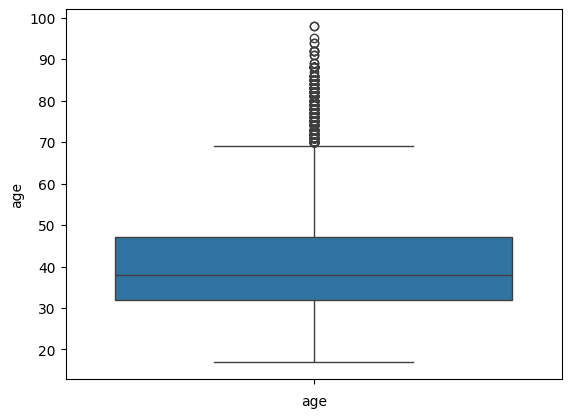

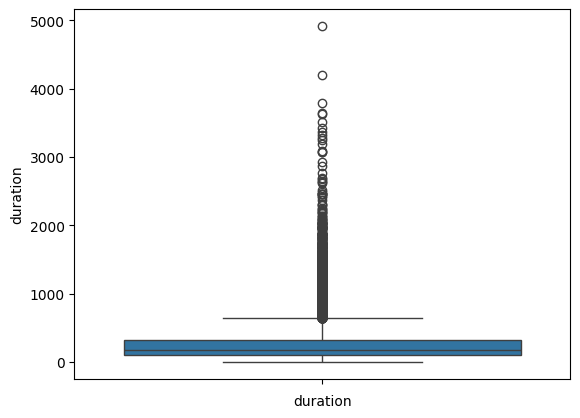

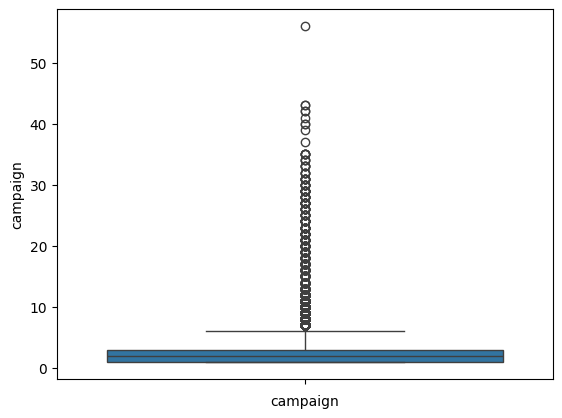

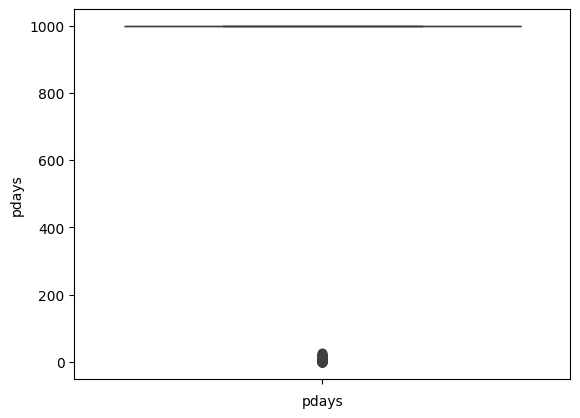

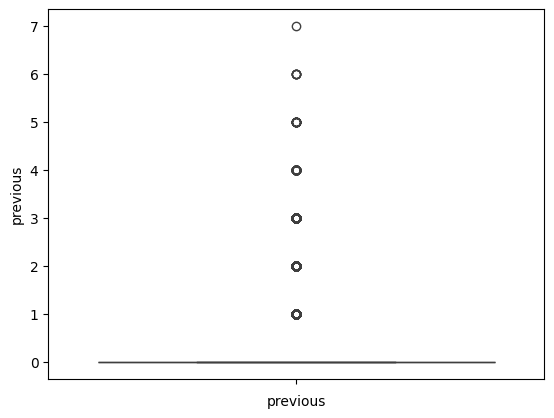

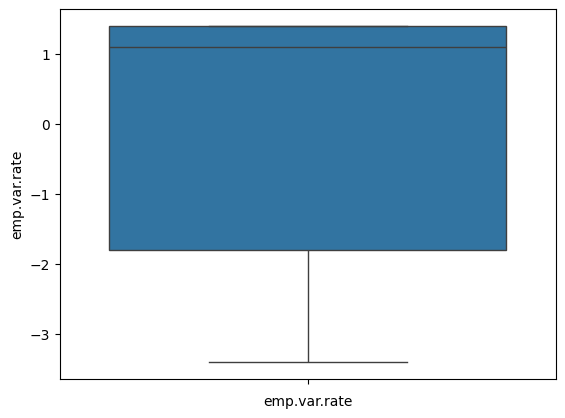

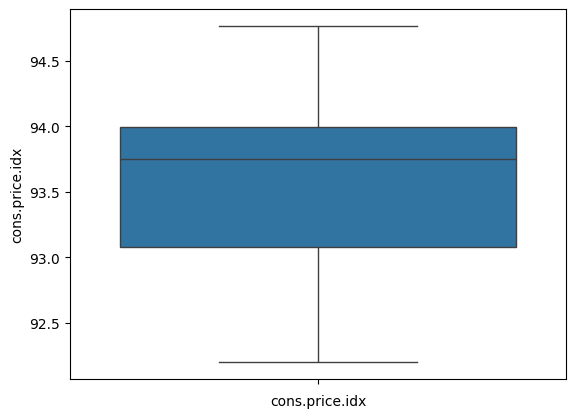

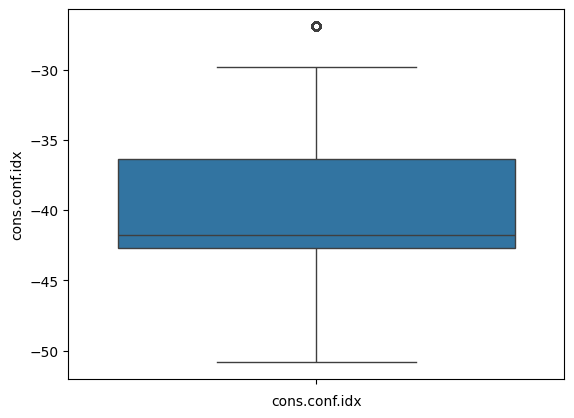

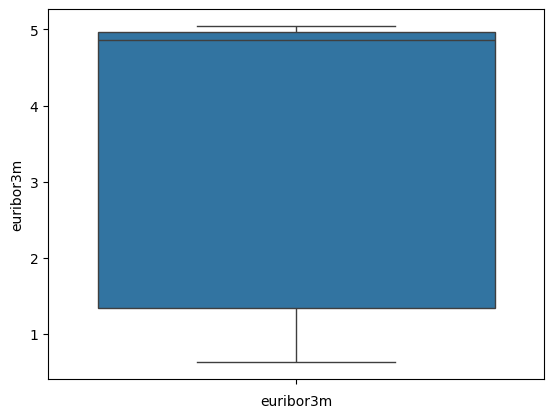

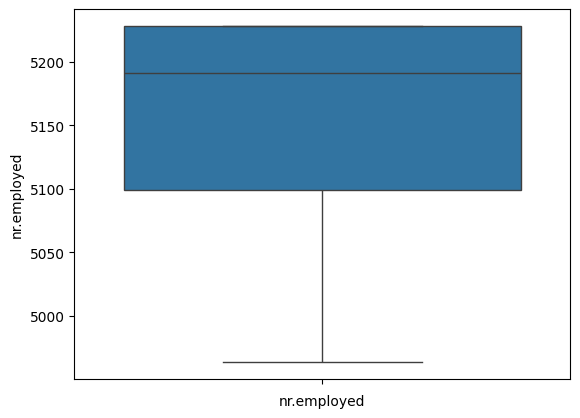

In [9]:
for i in col:
  if(df[i].dtype != 'object'):
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [10]:
# For a Better Interaction with the Box plot, We can Use Plotly
for i in col:
  if(df[i].dtype != 'object'):
    fig = px.box(df, i)
    fig.update_layout(xaxis_title = i, yaxis_title = 'count')
    fig.show()

In [11]:
fig=px.bar(df,x='job',title='job-status')
fig.update_layout(width=800,height=400,plot_bgcolor='green')
fig.show()

In [12]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [13]:
numerical_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

With reference to the above plot we can observe that some columns are having outliers .
So what actually outliers are  ,The values greater than upper limit and values lesser than lower limit .

Consider for age column
where  1st quantile /25th percentile value(Q1)  and 3rd quantile /75th percentile value(Q3)values are
data.age.quantile(.25),data.age.quantile(.75)=(32.0, 47.0)

With the help of Q1 and Q3 we will be finding out Inter Quantile Range (IQR) for Outlier analysis

Lets start with  age column

1.age

There are outliers

2.duration

There are outliers

3.campaign

There are outliers

4.pdays

There are no outliers

5.previous

There are no outliers

6.emp.var.rate

There are no outliers

7.cons.price.idx

There are no outliers

8.cons.conf.idx

There are  outliers

9.euribor3m

There are no outliers

10.nr.employed

There are no outliers

So from above inference only 4 columns as outliers those are 'age','duration','campaign','cons.conf.idx' .

So in next step we'll be handling it,


# IQR method

Now with the IQR method we will be removing the outlier


The interquartile range is calculated in much the same way as the range. All you do to find it is subtract the first quartile from the third quartile: IQR = Q3 – Q1. The interquartile range shows how the data is spread about the median


(data >= Q1 - 1.5*IQR) & (data <= Q3 + 1.5*IQR)

Where 1.5 is standard range set to check the outliers

So with the help of above formula and IQR value we can remove the outliers ,to remove the outliers we have to calculate the values within upper and lower limit

IQR=Q3-Q1

lower limit=Q1-1.5*IQR

upper limit=Q3+1.5*IQR

So consider for age column

Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
print(Q1-1.5*IQR,Q3+1.5*IQR)

(9.5 , 69.5)

So we'll consider values between (9.5 , 69.5) and rest all values will be outliers.

Same follows for all 4 ('age','duration','campaign','cons.conf.idx' ) columns.

In [14]:
#handling outliers
col_names=['age','duration','campaign','cons.conf.idx']

for i in col_names:

  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3 - Q1

  LB = Q1 - (1.5*IQR)
  UB = Q3 + (1.5*IQR)

  df = df[(df[i]>=LB)&(df[i]<=UB)]

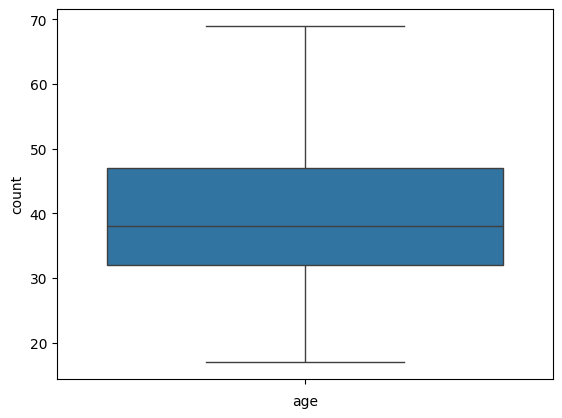

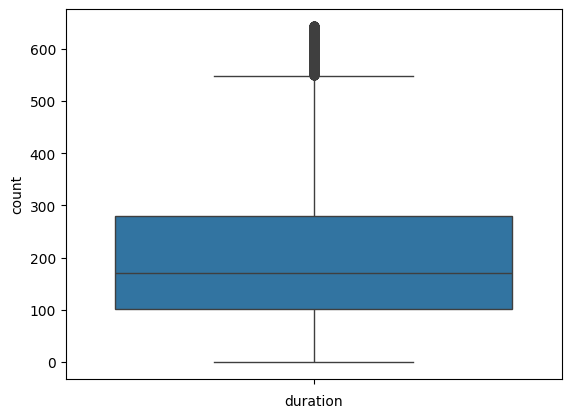

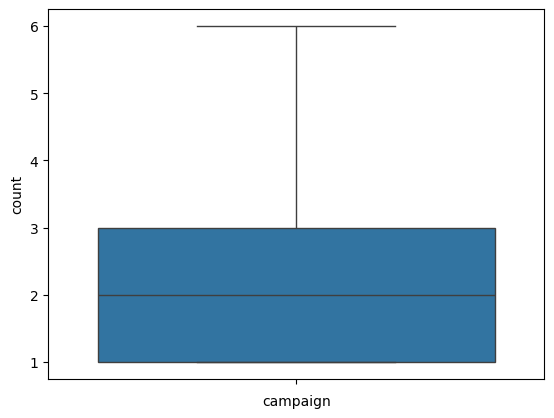

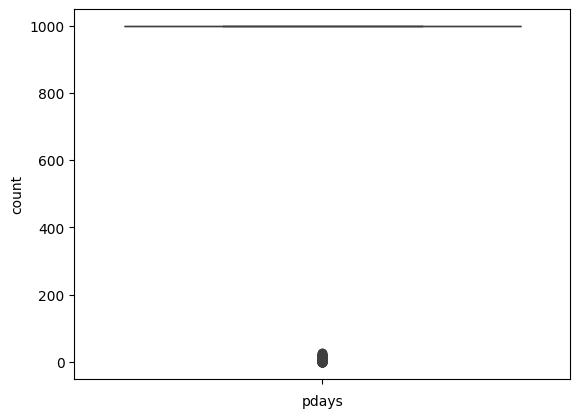

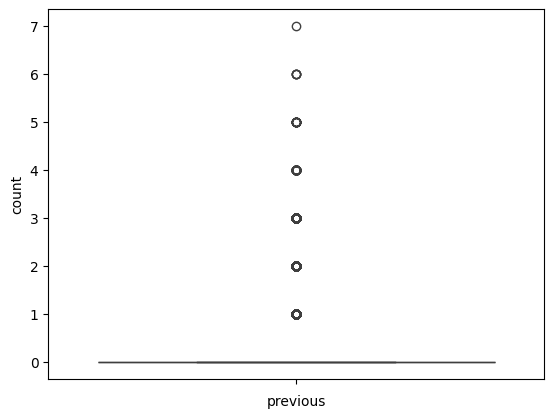

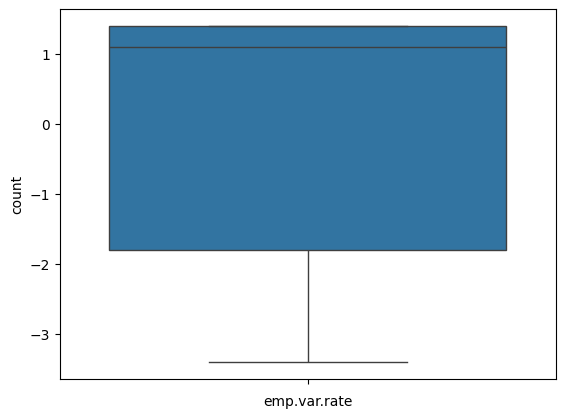

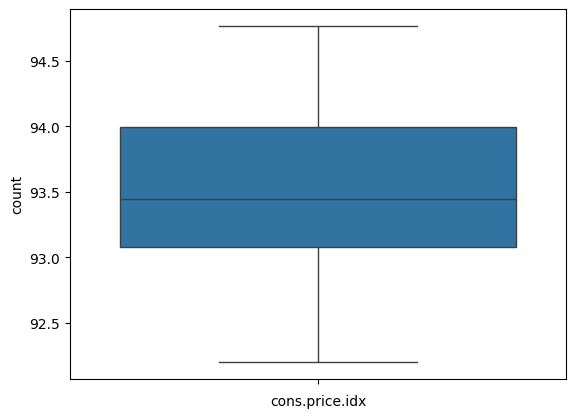

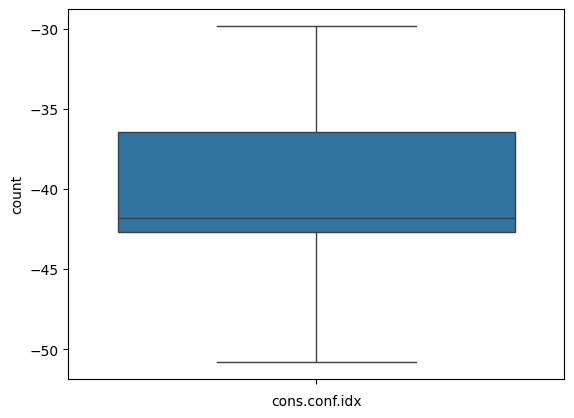

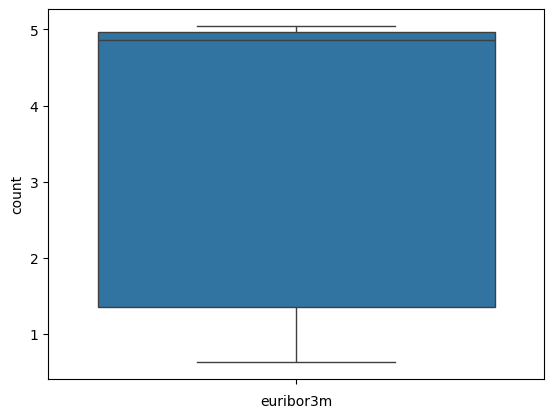

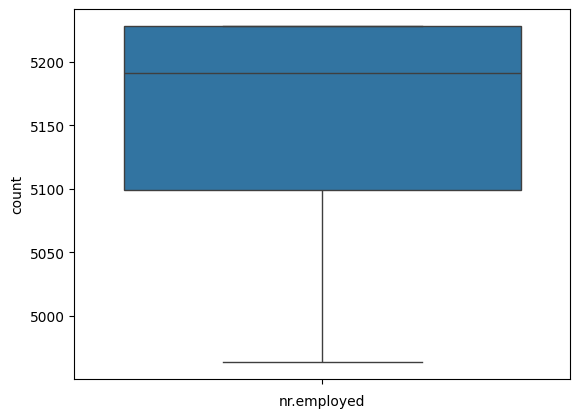

In [15]:
for i in numerical_columns:
  if(df[i].dtype != 'object'):
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,35176.000000,35176.000000,35176.000000,35176.000000,35176.000000,35176.000000,35176.000000,35176.000000,35176.000000,35176.000000
mean,39.582471,206.670201,2.049466,964.956533,0.171395,0.100372,93.577970,-40.662202,3.638603,5168.219442
std,9.637856,140.113670,1.286593,180.683128,0.489191,1.535238,0.568342,4.436523,1.715574,70.241231
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,101.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.354000,5099.100000
50%,38.000000,170.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,280.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.000000,644.000000,6.000000,999.000000,7.000000,1.400000,94.767000,-29.800000,5.045000,5228.100000


In [17]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


# For Creating HTML Report :-
Follow the steps Given Below -

(1) Using Sweetviz -

* Install sweetviz
* Install Numpy of version 1.23.5
* report.show_html('write_down_the_name_you_want_to_save_as.html')

(2) Using Y-Data Profiling -

* Install Y data profiling
* From Y data profiling import ProfileReport
* profile = ProfileReport(data, title="Harsh Pandas Profiling Report" explorative=True)
* profile.to_notebook_iframe()  # If using Jupyter Notebook
* profile.to_file("write_down_the_name_you_want_to_save_as.html")


# Here I am using Y-Data Profiling to make a detailed HTML report for this data.

In [18]:
!pip install ydata-profiling

In [19]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Raju Pandas Profiling Report", explorative=True)

In [20]:
profile.to_file("Raju_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:03<00:00,  6.74it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Missing Value Analysis


Checking for missing values and replacing the respective numerical and categorical values with mean/median and mode

In [21]:
#Checking for missing values and replacing the respective numerical and categorical values with mean/median and mode

df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [22]:
df['y'].value_counts()

,count
y,
no,32445
yes,2731


In [23]:
df['y'] = np.where(df['y'] == 'yes',1,0)   #encoding our target variable

In [24]:
df['y'].value_counts()

,count
y,
0,32445
1,2731


# Feature Selection

Why feature selection methods on the data?


because once you select a relevant features(independent attributes) ,then your model become more interpretable and model training speeds up and you'll end up with a efficient model.



Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable.



In [25]:
# Encoding all The rest of the Object Columns Present in the Data set except The Target Variable
col_list = []
for col in df.columns:
  if((df[col].dtype == 'object') & (col != 'y')):
    col_list.append(col)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in col_list:
  df[i] = le.fit_transform(df[i])

In [26]:
print('Classes: ',le.classes_)  # To check the which value assign 0,1,2

Classes:  ['failure' 'nonexistent' 'success']


In [27]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29.0,10,2,0,0,2,0,0,7,0,...,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46.0,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0


# 3.VIF

A variance inflation factor (VIF) is  a measure of multicollinearity among the independent variables in a multiple regression model.


Finding  multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables.


A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.


So we'll consider the VIF values <=5 ,rest all we'll remove the featuers with value >5.

1---->No multicolnearity

1-5--->Moderate (usually accepatable)

 '>5' --->Potential Milticolinearity

 '>10'--->serious Milticolinearity issue


 ###formula---->(1/1-R^2)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["Columns"] = X.columns
vif_data["VIF_score"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
print(vif_data)

           Columns     VIF_score
0              age     22.118069
1              job      2.101034
2          marital      5.690739
3        education      4.560904
4          default      1.411944
5          housing      2.212300
6             loan      1.208232
7          contact      2.942125
8            month      6.684565
9      day_of_week      3.100125
10        duration      3.230889
11        campaign      3.615137
12           pdays    174.948306
13        previous      6.070064
14        poutcome     34.944488
15    emp.var.rate     37.596312
16  cons.price.idx  37892.519421
17   cons.conf.idx    143.576649
18       euribor3m    322.719448
19     nr.employed  43122.996753


In [29]:
df=df.drop(['nr.employed'], axis = 1)   #remove the highest score then go for second

In [30]:
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
print(vif_data)

           feature         VIF
0              age   22.111825
1              job    2.100782
2          marital    5.690025
3        education    4.559289
4          default    1.409343
5          housing    2.211976
6             loan    1.208186
7          contact    2.445792
8            month    5.784092
9      day_of_week    3.099254
10        duration    3.221146
11        campaign    3.602003
12           pdays  174.903328
13        previous    5.973275
14        poutcome   34.679226
15    emp.var.rate   22.290646
16  cons.price.idx  729.727924
17   cons.conf.idx  124.904771
18       euribor3m  130.912349


In [31]:
df=df.drop(['cons.price.idx'], axis = 1)  # For columns wise 1 row wise 0

In [32]:
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

          feature        VIF
0             age  20.983786
1             job   2.095200
2         marital   5.545047
3       education   4.503997
4         default   1.409315
5         housing   2.210307
6            loan   1.207619
7         contact   2.347930
8           month   5.725662
9     day_of_week   3.084979
10       duration   3.196326
11       campaign   3.585783
12          pdays  95.526316
13       previous   3.040779
14       poutcome  17.523451
15   emp.var.rate  16.713203
16  cons.conf.idx  82.698535
17      euribor3m  93.837768


In [33]:
df=df.drop(['pdays'], axis = 1)  # For columns wise 1 row wise 0

In [34]:
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

          feature        VIF
0             age  20.158625
1             job   2.092012
2         marital   5.426749
3       education   4.450490
4         default   1.409218
5         housing   2.206582
6            loan   1.207481
7         contact   2.274508
8           month   5.664132
9     day_of_week   3.072875
10       duration   3.184386
11       campaign   3.566395
12       previous   1.497475
13       poutcome   8.135294
14   emp.var.rate  12.914596
15  cons.conf.idx  42.664350
16      euribor3m  63.950515


In [35]:

df=df.drop(['euribor3m'], axis = 1) # For columns wise 1 row wise 0

In [36]:
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

          feature        VIF
0             age  17.204375
1             job   2.085921
2         marital   5.226829
3       education   4.292721
4         default   1.408824
5         housing   2.198683
6            loan   1.207242
7         contact   2.266421
8           month   5.270091
9     day_of_week   3.032688
10       duration   3.177047
11       campaign   3.560513
12       previous   1.479672
13       poutcome   8.007187
14   emp.var.rate   1.547480
15  cons.conf.idx  32.084360


In [37]:
df=df.drop(['cons.conf.idx'], axis = 1)  # For columns wise 1 row wise 0

In [38]:
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

         feature        VIF
0            age  11.059814
1            job   2.076636
2        marital   4.372189
3      education   4.193904
4        default   1.407847
5        housing   2.162320
6           loan   1.204002
7        contact   2.242386
8          month   4.871294
9    day_of_week   2.969315
10      duration   3.105854
11      campaign   3.394100
12      previous   1.477106
13      poutcome   7.684902
14  emp.var.rate   1.532129


In [39]:
df=df.drop(['age'], axis = 1)   # For columns wise 1 row wise 0

In [40]:
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

         feature       VIF
0            job  2.053449
1        marital  4.351868
2      education  4.013689
3        default  1.323067
4        housing  2.112473
5           loan  1.200812
6        contact  2.241181
7          month  4.605622
8    day_of_week  2.888663
9       duration  2.988974
10      campaign  3.194111
11      previous  1.442179
12      poutcome  6.540213
13  emp.var.rate  1.531208


In [41]:
df=df.drop(['poutcome'], axis = 1)  # For columns wise 1 row wise 0

In [42]:
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

         feature       VIF
0            job  2.034231
1        marital  4.135615
2      education  3.789111
3        default  1.313447
4        housing  2.080578
5           loan  1.198794
6        contact  2.225331
7          month  4.489808
8    day_of_week  2.803779
9       duration  2.834883
10      campaign  3.069186
11      previous  1.371430
12  emp.var.rate  1.522860


In [43]:
df

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,y
0,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1,0
1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1,0
2,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1,0
3,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1,0
4,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1,1
41182,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1,0
41184,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1,0
41185,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1,0


# Model Building

In [44]:
# Model Building

Ind_Features = list(df.columns)
Ind_Features.remove('y')
x = df[Ind_Features]  #Independent (Features)
y = df['y']   #dependent (Target)

In [45]:
x

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1
1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1
2,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1
3,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1
4,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1
41182,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1
41184,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1
41185,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1


In [46]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41181,1
41182,0
41184,0
41185,0


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [48]:
# Standardscaler used the z-score to rescale the data

from sklearn.preprocessing import StandardScaler  # With the help of this we rescale the dataset in one range
SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.transform(x_test)

In [49]:
x_train

array([[ 1.19622647,  1.35647121, -0.35139444, ..., -0.81676576,
        -0.34811227,  0.84213128],
       [-1.02466352, -0.28714352, -0.35139444, ...,  3.0654615 ,
        -0.34811227,  0.84213128],
       [ 0.08578148, -0.28714352, -0.35139444, ..., -0.0403203 ,
        -0.34811227,  0.84213128],
       ...,
       [ 0.64100397, -1.93075825,  1.06186153, ..., -0.81676576,
        -0.34811227, -1.24207402],
       [-1.02466352, -0.28714352,  1.06186153, ..., -0.81676576,
        -0.34811227, -0.13483995],
       [-0.74705227, -0.28714352, -0.82247976, ..., -0.81676576,
        -0.34811227,  0.64673703]])

In [50]:
x_test

array([[-0.74705227, -0.28714352, -1.76465041, ..., -0.0403203 ,
        -0.34811227,  0.64673703],
       [ 1.47383772, -0.28714352,  0.59077621, ..., -0.81676576,
         1.68597367, -1.24207402],
       [ 1.47383772,  1.35647121,  1.06186153, ..., -0.81676576,
        -0.34811227,  0.64673703],
       ...,
       [-1.02466352, -0.28714352, -1.29356509, ...,  0.73612515,
        -0.34811227,  0.84213128],
       [-0.74705227, -0.28714352, -1.76465041, ..., -0.81676576,
        -0.34811227, -1.24207402],
       [ 1.47383772,  1.35647121,  1.06186153, ...,  0.73612515,
        -0.34811227,  0.64673703]])

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model = LogisticRegression()

In [53]:
#####  Model Fitting/Training  ###
model.fit(x_train,y_train)

LogisticRegression()

In [54]:
test_prediction = model.predict(x_test)

In [55]:
test_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
from sklearn.metrics import *

In [57]:
accuracy_score(y_test,test_prediction)

0.9280191039345008

In [58]:
confusion_matrix(y_test,test_prediction)

array([[8002,  142],
       [ 491,  159]])

In [59]:
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8144
           1       0.53      0.24      0.33       650

    accuracy                           0.93      8794
   macro avg       0.74      0.61      0.65      8794
weighted avg       0.91      0.93      0.92      8794



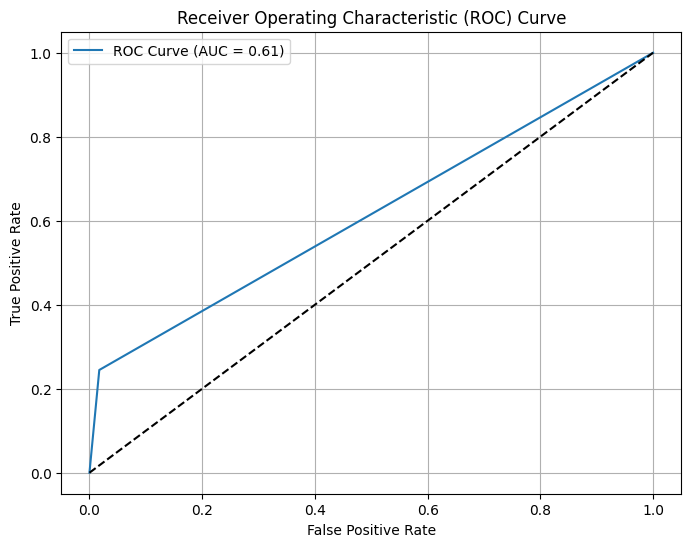

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,test_prediction)

# Calculate AUC (Area Under Curve) score
auc_score = roc_auc_score(y_test,test_prediction)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()
